<a href="https://colab.research.google.com/github/EmperorBlackMD/AIHC-5010/blob/main/Homework_1_5010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Perceptron Learning and the XOR Limitation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Perceptron Implementation

#The perceptron is a linear classifier**. It is guaranteed to converge **only if the data are linearly separable**.

class Perceptron:
    def _predict_single(self, x):
        linear_output = np.dot(x, self.w) + self.b
        return int(linear_output >= 0)

    def __init__(self, lr=0.1, n_epochs=50):
        self.lr = lr
        self.n_epochs = n_epochs
        self.errors_ = []

    def fit(self, X, y, verbose=False):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        self.errors_ = []

        for epoch in range(self.n_epochs):
            errors = 0
            for i in range(n_samples):
                y_hat = self._predict_single(X[i])
                update = self.lr * (y[i] - y_hat)
                self.w += update * X[i]
                self.b += update
                errors += int(update != 0)

            self.errors_.append(errors)

            if verbose and (epoch + 1) % 10 == 0:
                acc = self.accuracy(X, y)
                print(f"Epoch {epoch+1}: Errors = {errors}, Accuracy = {acc:.2%}")

            if errors == 0:
                print(f"Converged at epoch {epoch+1}")
                break

    def predict(self, X):
        if X.ndim == 1:
            return self._predict_single(X)
        return np.array([self._predict_single(x) for x in X])

    def accuracy(self, X, y):
        return np.mean(self.predict(X) == y)

In [82]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    import matplotlib.pyplot as plt
    import numpy as np

    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = np.array(Z).reshape(xx.shape)  # ensure NumPy array

    plt.figure(figsize=(7, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=100, cmap='RdYlBu')

    for i, label in enumerate(y):
        plt.annotate(str(label), (X[i,0]+0.02, X[i,1]+0.02))

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()


In [76]:
print(hasattr(model_sep, "predict"))
print(type(model_sep))


True
<class '__main__.Perceptron'>


Converged at epoch 3


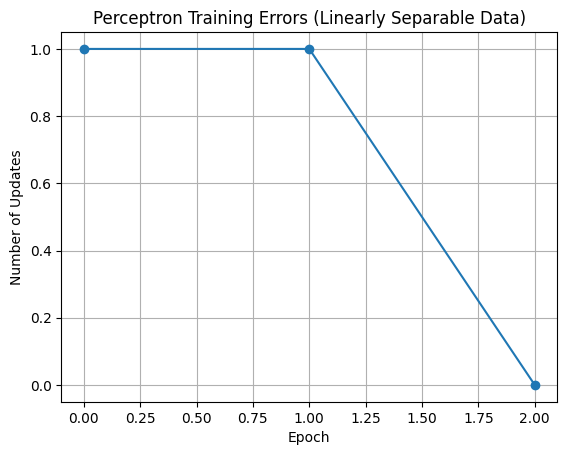

In [83]:
## Dataset 1: Linearly Separable Data

np.random.seed(0)

X1 = np.random.randn(50, 2) + np.array([2, 2])
X2 = np.random.randn(50, 2) + np.array([-2, -2])
X_sep = np.vstack((X1, X2))
y_sep = np.array([1]*50 + [0]*50)

model_sep = Perceptron(lr=0.1, n_epochs=30)
model_sep.fit(X_sep, y_sep, verbose=True)

### Training Error Curve
plt.plot(model_sep.errors_, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Number of Updates")
plt.title("Perceptron Training Errors (Linearly Separable Data)")
plt.grid(True)
plt.show()


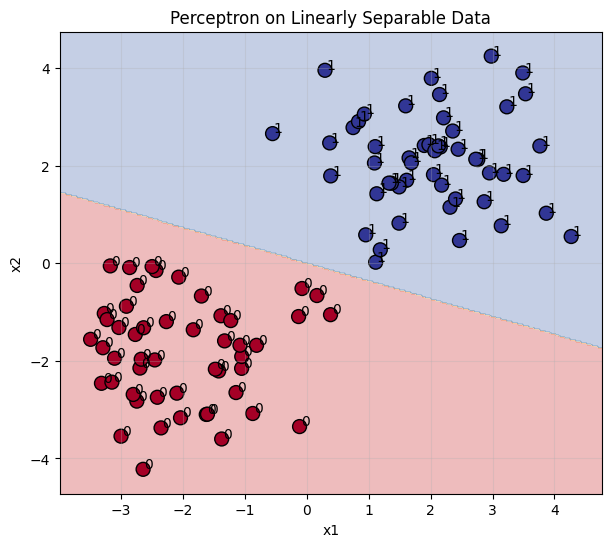

Epoch 10: Errors = 4, Accuracy = 50.00%
Epoch 20: Errors = 4, Accuracy = 50.00%
Epoch 30: Errors = 4, Accuracy = 50.00%
Epoch 40: Errors = 4, Accuracy = 50.00%


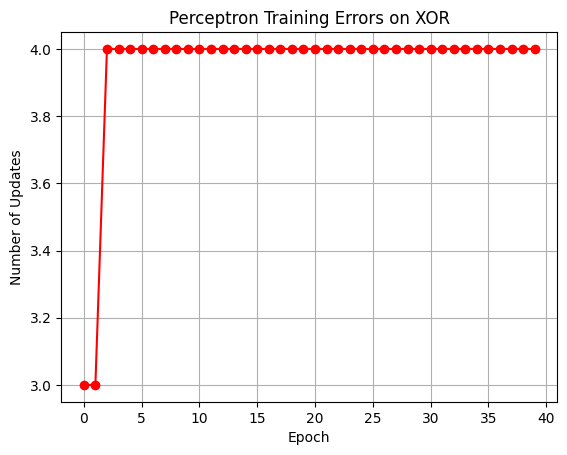

In [84]:
### Decision Boundary
plot_decision_boundary(model_sep, X_sep, y_sep,
                      "Perceptron on Linearly Separable Data")

## Dataset 2: XOR Problem (Not Linearly Separable)
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor = np.array([0, 1, 1, 0])

xor_model = Perceptron(lr=0.1, n_epochs=40)
xor_model.fit(X_xor, y_xor, verbose=True)

### Training Error Curve (Failure to Converge)
plt.plot(xor_model.errors_, marker='o', color='red')
plt.xlabel("Epoch")
plt.ylabel("Number of Updates")
plt.title("Perceptron Training Errors on XOR")
plt.grid(True)
plt.show()

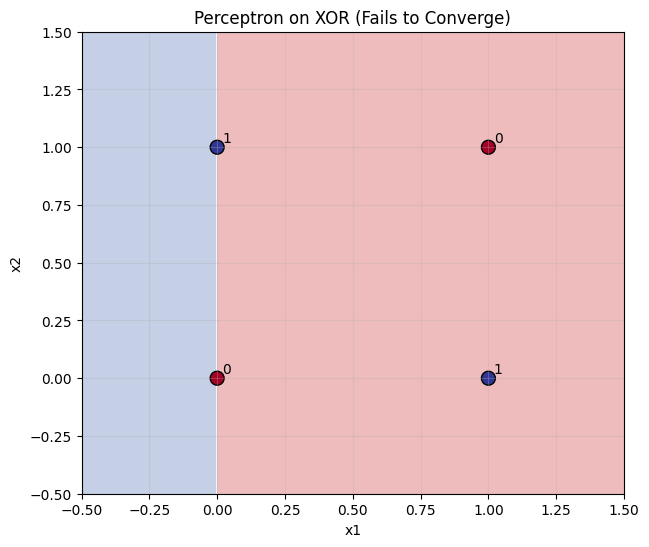

Input: [0 0], Predicted: 1, True: 0
Input: [0 1], Predicted: 1, True: 1
Input: [1 0], Predicted: 0, True: 1
Input: [1 1], Predicted: 0, True: 0


In [85]:
### Decision Boundary on XOR
plot_decision_boundary(xor_model, X_xor, y_xor,
                      "Perceptron on XOR (Fails to Converge)")

### Predictions
for x, y_true in zip(X_xor, y_xor):
    print(f"Input: {x}, Predicted: {xor_model.predict(x)}, True: {y_true}")